<a href="https://colab.research.google.com/github/khushimalik3122/salary-predictor-19/blob/main/sp19_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/sp_19_app/finalcleaned_dataset.csv')

In [4]:
df.shape

(1806, 172)

In [5]:
df.describe()

,Unnamed: 0,Rating,Easy Apply,Min Salary (K),Max Salary (K),Avg Salary (K),Company_Encoded,Salary Range (K),Log Avg Salary
count,1806.000000,1806.000000,1806.0,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000
mean,941.878738,3.268439,0.0,3.953735,4.483971,71.773533,6.291620,36.690476,2.062650
std,550.457778,1.373428,0.0,0.236729,0.197558,14.568786,1.019781,12.999680,0.047979
min,0.000000,0.000000,0.0,3.526361,4.110874,47.000000,0.000000,6.000000,1.964874
25%,463.250000,3.100000,0.0,3.761200,4.330733,60.000000,5.858646,29.000000,2.025498
50%,944.500000,3.600000,0.0,3.931826,4.465908,70.000000,6.624729,37.000000,2.061188
75%,1425.750000,4.000000,0.0,4.094345,4.634729,79.000000,7.033286,46.000000,2.091831
max,1881.000000,5.000000,0.0,4.584967,4.882802,106.000000,7.313887,64.000000,2.159500


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Rating', 'Company Name', 'Easy Apply',
       'Salary Estimate Cleaned', 'Min Salary (K)', 'Max Salary (K)',
       'Avg Salary (K)', 'Job City', 'Job State',
       ...
       'Job Title Simplified_Data Scientist', 'Job Title Simplified_Engineer',
       'Job Title Simplified_Intern', 'Job Title Simplified_Lead Analyst',
       'Job Title Simplified_Manager', 'Job Title Simplified_Senior Analyst',
       'Job Title Group', 'Job Title Cleaned', 'Salary Range (K)',
       'Log Avg Salary'],
      dtype='object', length=172)


# EDA

# 1. Which job roles, locations, and companies dominate the hiring space?**

# * a.  Top 10 In-Demand Job Titles*

<ipython-input-7-584512027fa0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")


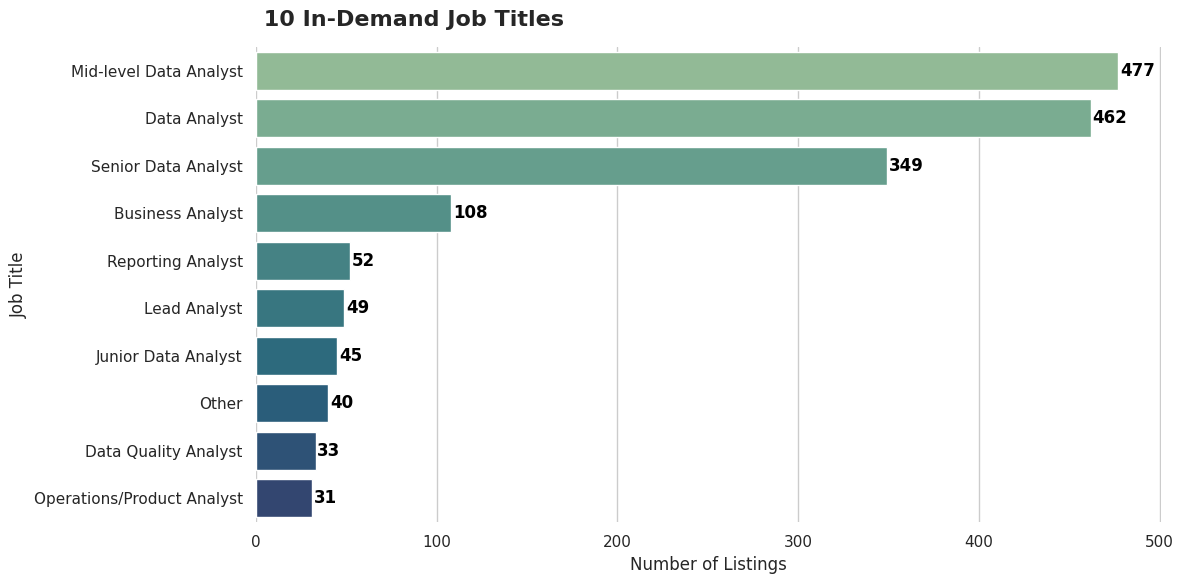

In [7]:
sns.set(style="whitegrid")


df['Job Title '] = df['Job Title Group']

# Data
top_jobs = df['Job Title Group'].value_counts().head(10)

#  figure and axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")

# Title & Labels
plt.title(" 10 In-Demand Job Titles", fontsize=16, weight='bold', loc='left', pad=15)
plt.xlabel("Number of Listings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)

#  count labels next to bars
for i, v in enumerate(top_jobs.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

# Final result
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# ** b. Top 10 Hiring Locations bold text**

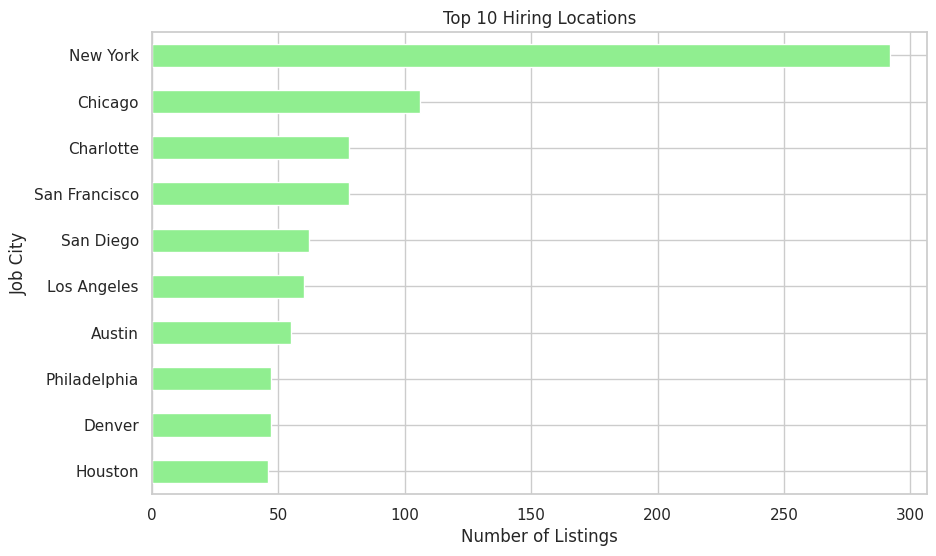

In [8]:
top_locations = df['Job City'].value_counts().head(10)
top_locations.plot(kind='barh', figsize=(10,6), color='lightgreen')
plt.title("Top 10 Hiring Locations")
plt.xlabel("Number of Listings")
plt.gca().invert_yaxis()
plt.show()

# ** c. Top 10 Companies Hiring**

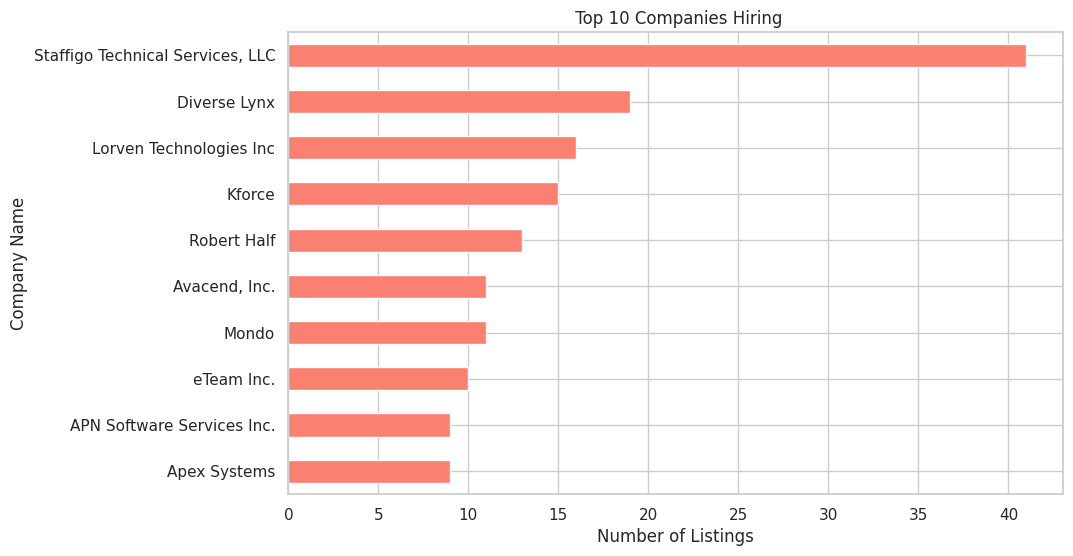

In [9]:
if 'Company Name' in df.columns:
	top_companies = df['Company Name'].value_counts().head(10)
	top_companies.plot(kind='barh', figsize=(10,6), color='salmon')
	plt.title(" Top 10 Companies Hiring")
	plt.xlabel("Number of Listings")
	plt.gca().invert_yaxis()
	plt.show()
else:
	print("Column 'Company Name' not found in the DataFrame.")


# **How do company rating and job location impact average salaries?
# company Rating vs Avg Salaryt**

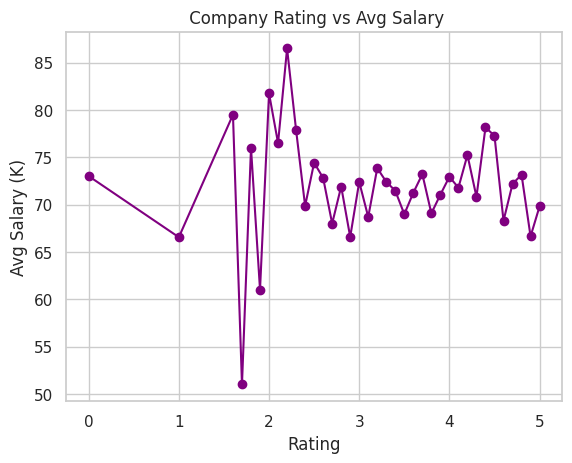

In [10]:
df['Rating'] = df['Rating'].replace(-1, 0)

rating_salary = df.groupby('Rating')['Avg Salary (K)'].mean().sort_index()
rating_salary.plot(kind='line', marker='o', color='purple')
plt.title(" Company Rating vs Avg Salary")
plt.xlabel("Rating")
plt.ylabel("Avg Salary (K)")
plt.grid(True)
plt.show()

# ***Top Paying Locations***

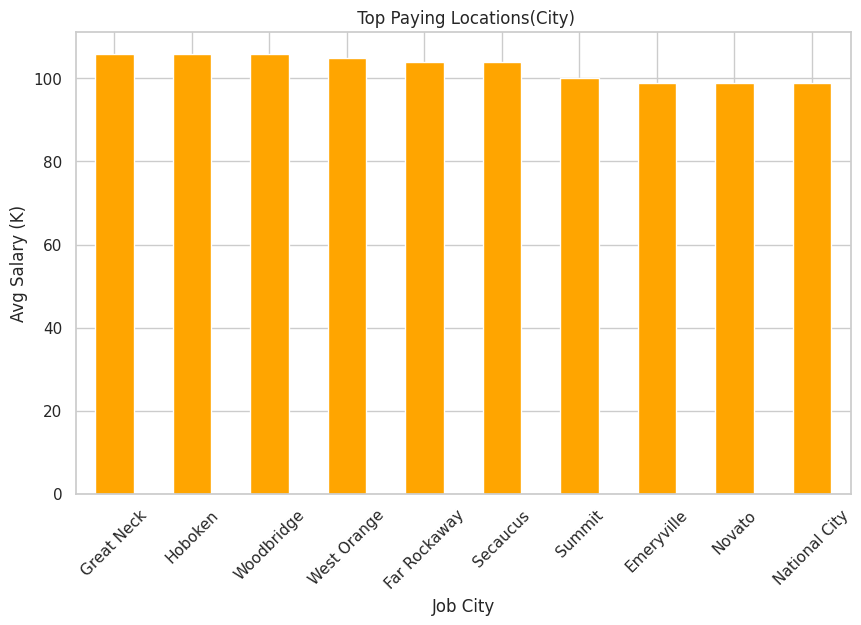

In [11]:
location_salary = df.groupby('Job City')['Avg Salary (K)'].mean().sort_values(ascending=False).head(10)
location_salary.plot(kind='bar', figsize=(10,6), color='orange')
plt.title(" Top Paying Locations(City)")
plt.ylabel("Avg Salary (K)")
plt.xticks(rotation=45)
plt.show()

In [12]:

df=df.drop(['Unnamed: 0'], axis=1)

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

X=df.drop(['Salary Estimate Cleaned','Min Salary (K)', 'Max Salary (K)',
       'Avg Salary (K)','Salary Range (K)', 'Log Avg Salary'], axis=1)
y=df['Avg Salary (K)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.preprocessing import LabelEncoder

# Convert target variable to valid class labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Verify the transformed labels
print("Transformed y_train:", y_train)
print("Classes:", label_encoder.classes_)

Transformed y_train: [ 8 33 12 ... 15 13 12]
Classes: [ 47.  51.  52.  53.  54.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  66.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.
  81.  85.  87.  88.  89.  91.  92.  98.  99. 100. 104. 106.]


In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error



In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the combined data and transform both the training and test data
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le.fit(X[col])  # Fit on the combined data
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# If the target variable is categorical, fit a separate LabelEncoder for it
if y.dtype == 'object':
    le_target = LabelEncoder()
    le_target.fit(y)
    y_train = le_target.transform(y_train)
    y_test = le_target.transform(y_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor()
}


# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f"Model: {model_name}, RMSE: {rmse:.2f}")

Model: Linear Regression, RMSE: 15.71
Model: Ridge Regression, RMSE: 15.35
Model: Lasso Regression, RMSE: 14.98
Model: Elastic Net Regression, RMSE: 14.99
Model: Decision Tree Regressor, RMSE: 18.43
Model: Random Forest Regressor, RMSE: 14.26
Model: Gradient Boosting Regressor, RMSE: 14.24
Model: Support Vector Regressor, RMSE: 15.04
Model: K-Nearest Neighbors Regressor, RMSE: 16.83
Model: XGBoost Regressor, RMSE: 14.86


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X = df.drop(['Salary Estimate Cleaned','Min Salary (K)', 'Max Salary (K)',
             'Avg Salary (K)','Salary Range (K)', 'Log Avg Salary'], axis=1)
y = df['Avg Salary (K)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the combined data and transform both the training and test data
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le.fit(X[col])  # Fit on the combined data
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# If the target variable is categorical, fit a separate LabelEncoder for it
if y.dtype == 'object':
    le_target = LabelEncoder()
    le_target.fit(y)
    y_train = le_target.transform(y_train)
    y_test = le_target.transform(y_test)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model and the hyperparameter grid
model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter tuning spaces
param_grids = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.1, 0.05, 0.01, 0.005],
    "max_depth": [3, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10]
}

# Perform grid search with error_score='raise'
grid_search = GridSearchCV(model, param_grids, cv=5, scoring="neg_mean_squared_error", error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Train and evaluate the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE for the best model: {mse}')

NameError: name 'df' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models
models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42)
}

# Split data into training and testing sets
X = df.drop(['Salary Estimate Cleaned','Min Salary (K)', 'Max Salary (K)',
             'Avg Salary (K)','Salary Range (K)', 'Log Avg Salary'], axis=1)
y = df['Avg Salary (K)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Get the feature importances
    if model_name == "Random Forest Regressor" or model_name == "Gradient Boosting Regressor":
        feature_importances = model.feature_importances_
    elif model_name == "XGBoost Regressor":
        feature_importances = model.feature_importances_

    # Get the top 10 features
    top_10_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)[:10]

    # Print the top 10 features
    print(f"Model: {model_name}")
    for feature, importance in top_10_features:
        print(f"{feature}: {importance:.2f}")

    # Plot the top 10 features
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[feature for feature, _ in top_10_features], y=[importance for _, importance in top_10_features])
    plt.title(f"Top 10 Features for {model_name}")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()